## 1. Install Required Libraries


In [1]:
# Install all required libraries
!pip install pandas numpy matplotlib seaborn wordcloud nltk scikit-learn


## 2. Import Libraries


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


All libraries imported successfully!


## 3. Load the Dataset


In [ ]:


from google.colab import drive
drive.mount('/content/drive')


filename = '/content/cleaned_df.csv'

print(f"Using file from Google Drive: {filename}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using file from Google Drive: /content/cleaned_df.csv


In [9]:


# Load the dataset
df = pd.read_csv(filename)

# Display basic info
print("="*60)
print("DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f"\nShape: {df.shape[0]} reviews, {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")


DATASET LOADED SUCCESSFULLY

Shape: 20491 reviews, 3 columns

Columns: ['Review', 'Rating', 'Length']


## 4. Explore the Dataset


In [10]:
# Display first 5 rows
print("First 5 Reviews:")
print("="*60)
df.head()


First 5 Reviews:


,Review,Rating,Length
0,nice hotel expensive park get good deal stay h...,Good,512
1,ok nothing special charge diamond member hilto...,Bad,1538
2,nice room 4 experience hotel monaco seattle go...,Netral,1325
3,unique great stay wonderful time hotel monaco ...,Good,546
4,great stay great stay go seahawk game awesome ...,Good,1117


In [11]:
# Dataset info
print("Dataset Information:")
print("="*60)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
 2   Length  20491 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 480.4+ KB


In [12]:
# Statistical summary
print("Statistical Summary:")
print("="*60)
df.describe()


Statistical Summary:


,Length
count,20491.000000
mean,660.971402
std,623.574911
min,32.000000
25%,311.000000
50%,491.000000
75%,786.000000
max,12281.000000


In [13]:
# Check for missing values
print("Missing Values:")
print("="*60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")


Missing Values:
Review    0
Rating    0
Length    0
dtype: int64

Total missing values: 0


In [14]:
# Check for duplicates
print("Duplicate Check:")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Duplicate Check:
Number of duplicate rows: 0


In [15]:
# Sentiment distribution
print("Sentiment Distribution:")
print("="*60)
sentiment_counts = df['Rating'].value_counts()
print(sentiment_counts)
print(f"\nPercentages:")
print(round(df['Rating'].value_counts(normalize=True) * 100, 2))


Sentiment Distribution:
Rating
Good      15093
Bad        3214
Netral     2184
Name: count, dtype: int64

Percentages:
Rating
Good      73.66
Bad       15.68
Netral    10.66
Name: proportion, dtype: float64


## 5. Data Preprocessing


In [16]:
# Fix the typo in 'Netral' to 'Neutral'
df['Rating'] = df['Rating'].replace('Netral', 'Neutral')

# Verify the fix
print("Updated Sentiment Distribution:")
print("="*60)
print(df['Rating'].value_counts())


Updated Sentiment Distribution:
Rating
Good       15093
Bad         3214
Neutral     2184
Name: count, dtype: int64


In [17]:
# Create a copy for analysis
df_clean = df.copy()

# Remove any rows with missing reviews
df_clean = df_clean.dropna(subset=['Review'])

# Calculate actual review length (word count)
df_clean['Word_Count'] = df_clean['Review'].apply(lambda x: len(str(x).split()))

print(f"Clean dataset shape: {df_clean.shape}")
print(f"\nWord count statistics:")
print(df_clean['Word_Count'].describe())


Clean dataset shape: (20491, 4)

Word count statistics:
count    20491.000000
mean       100.679469
std         96.691129
min          6.000000
25%         47.000000
50%         74.000000
75%        119.000000
max       1887.000000
Name: Word_Count, dtype: float64


---
## 6. Visualizations
---

### 6.1 Sentiment Distribution Bar Chart


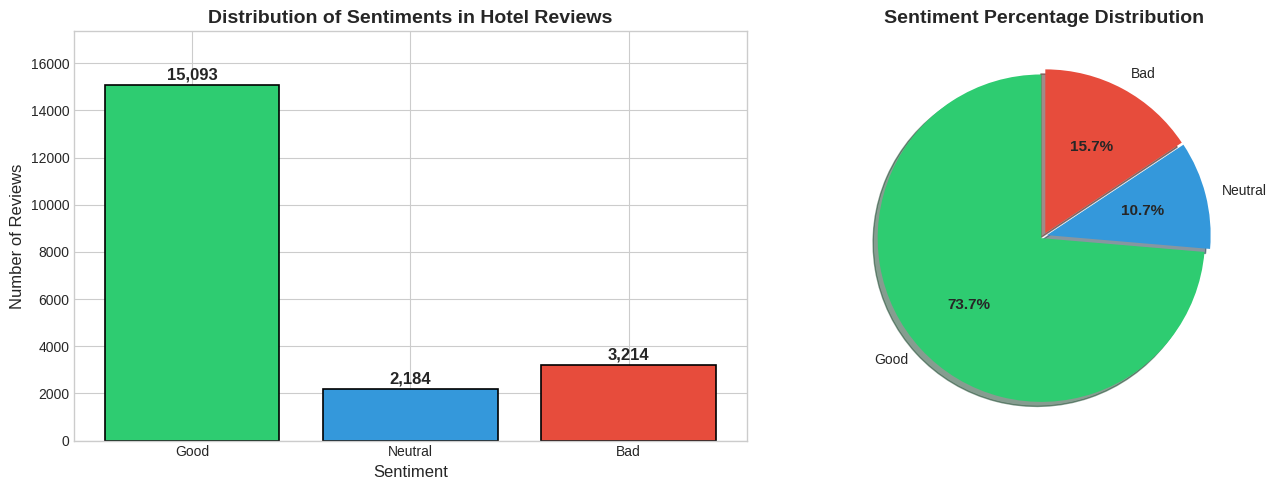


✓ Sentiment distribution chart saved as 'sentiment_distribution.png'


In [18]:
# Sentiment Distribution Bar Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Colors for sentiments
colors = {'Good': '#2ecc71', 'Bad': '#e74c3c', 'Neutral': '#3498db'}
sentiment_order = ['Good', 'Neutral', 'Bad']

# Bar Chart
sentiment_counts = df_clean['Rating'].value_counts().reindex(sentiment_order)
bars = axes[0].bar(sentiment_counts.index, sentiment_counts.values,
                   color=[colors[s] for s in sentiment_counts.index],
                   edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, count in zip(bars, sentiment_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                 f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Number of Reviews', fontsize=12)
axes[0].set_title('Distribution of Sentiments in Hotel Reviews', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(sentiment_counts.values) * 1.15)

# Pie Chart
explode = (0.02, 0.02, 0.02)
wedges, texts, autotexts = axes[1].pie(sentiment_counts.values,
                                        labels=sentiment_counts.index,
                                        colors=[colors[s] for s in sentiment_counts.index],
                                        autopct='%1.1f%%',
                                        explode=explode,
                                        shadow=True,
                                        startangle=90)
axes[1].set_title('Sentiment Percentage Distribution', fontsize=14, fontweight='bold')

# Make percentage labels bold
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Sentiment distribution chart saved as 'sentiment_distribution.png'")


### 6.2 Review Length Distribution


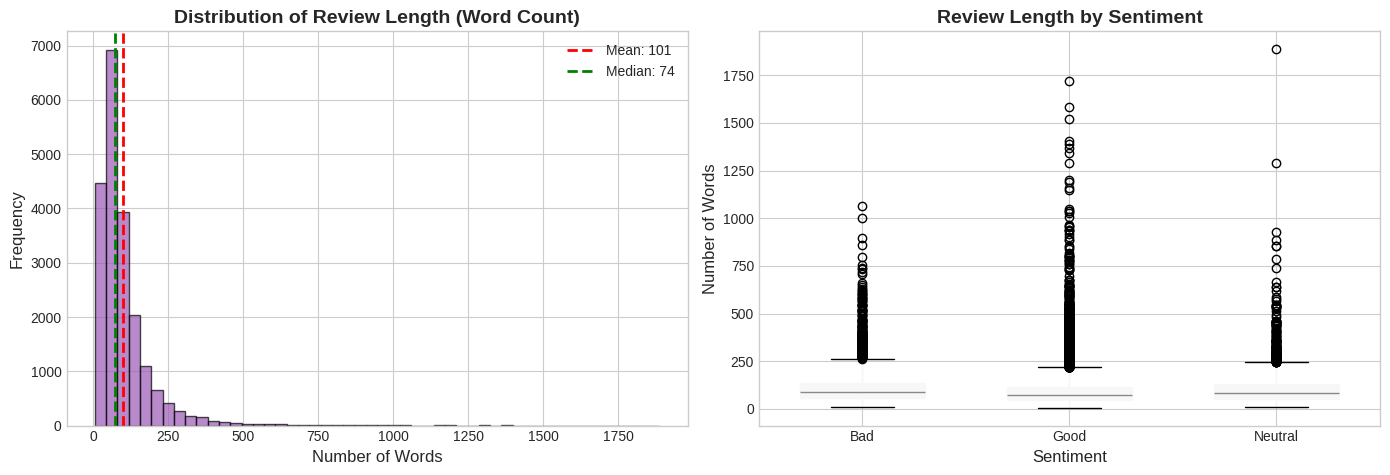


✓ Review length distribution chart saved as 'review_length_distribution.png'


In [19]:
# Review Length Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of word counts
axes[0].hist(df_clean['Word_Count'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0].axvline(df_clean['Word_Count'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df_clean["Word_Count"].mean():.0f}')
axes[0].axvline(df_clean['Word_Count'].median(), color='green', linestyle='--', linewidth=2,
                label=f'Median: {df_clean["Word_Count"].median():.0f}')
axes[0].set_xlabel('Number of Words', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Review Length (Word Count)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)

# Box plot by sentiment
df_clean.boxplot(column='Word_Count', by='Rating', ax=axes[1],
                 positions=[1, 2, 3], widths=0.6, patch_artist=True)

axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Number of Words', fontsize=12)
axes[1].set_title('Review Length by Sentiment', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.savefig('review_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Review length distribution chart saved as 'review_length_distribution.png'")


### 6.3 Word Clouds by Sentiment




In [20]:
# Get stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords relevant to hotel reviews
custom_stopwords = {'hotel', 'room', 'stay', 'night', 'would', 'one', 'get', 'also',
                    'like', 'really', 'could', 'go', 'got', 'make', 'even', 'say',
                    'told', 'went', 'came', 'take', 'give', 'thing', 'see', 'know'}
stop_words = stop_words.union(custom_stopwords)

def generate_wordcloud(text, title, color_map, ax):
    """Generate and display a word cloud"""
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stop_words,
                          colormap=color_map,
                          max_words=100,
                          max_font_size=150,
                          random_state=42).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=10)
    ax.axis('off')


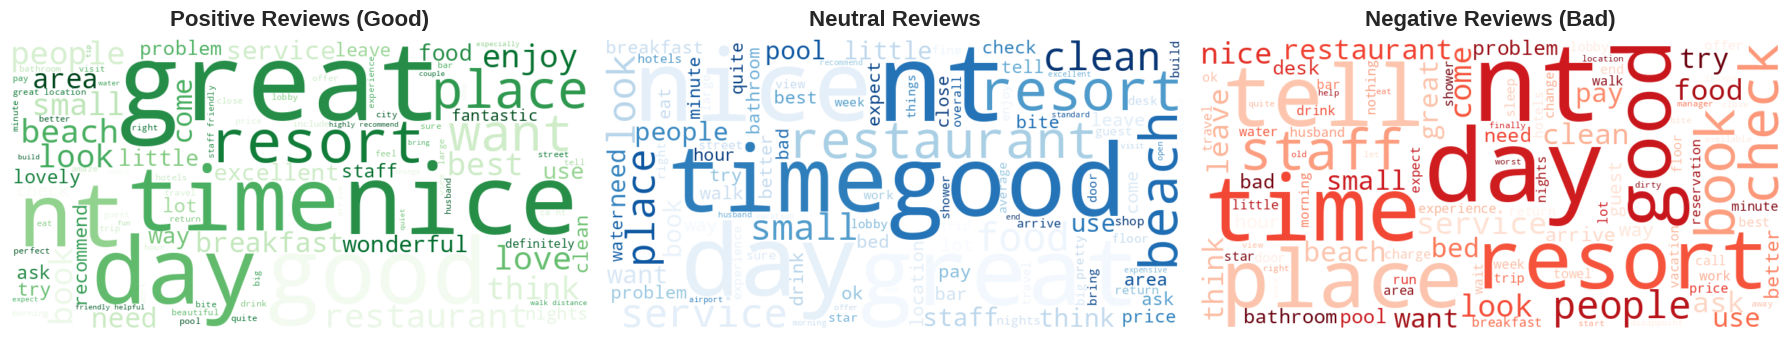


✓ Word clouds saved as 'wordclouds_by_sentiment.png'


In [21]:
# Create word clouds for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Positive reviews word cloud
positive_text = ' '.join(df_clean[df_clean['Rating'] == 'Good']['Review'].astype(str))
generate_wordcloud(positive_text, 'Positive Reviews (Good)', 'Greens', axes[0])

# Neutral reviews word cloud
neutral_text = ' '.join(df_clean[df_clean['Rating'] == 'Neutral']['Review'].astype(str))
generate_wordcloud(neutral_text, 'Neutral Reviews', 'Blues', axes[1])

# Negative reviews word cloud
negative_text = ' '.join(df_clean[df_clean['Rating'] == 'Bad']['Review'].astype(str))
generate_wordcloud(negative_text, 'Negative Reviews (Bad)', 'Reds', axes[2])

plt.tight_layout()
plt.savefig('wordclouds_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Word clouds saved as 'wordclouds_by_sentiment.png'")


### 6.4 Most Frequent Words Analysis


In [22]:
def get_top_words(reviews, n=15):
    """Get the top n most frequent words from reviews"""
    all_words = []
    for review in reviews:
        words = str(review).lower().split()
        words = [word for word in words if word not in stop_words and len(word) > 2]
        all_words.extend(words)
    return Counter(all_words).most_common(n)


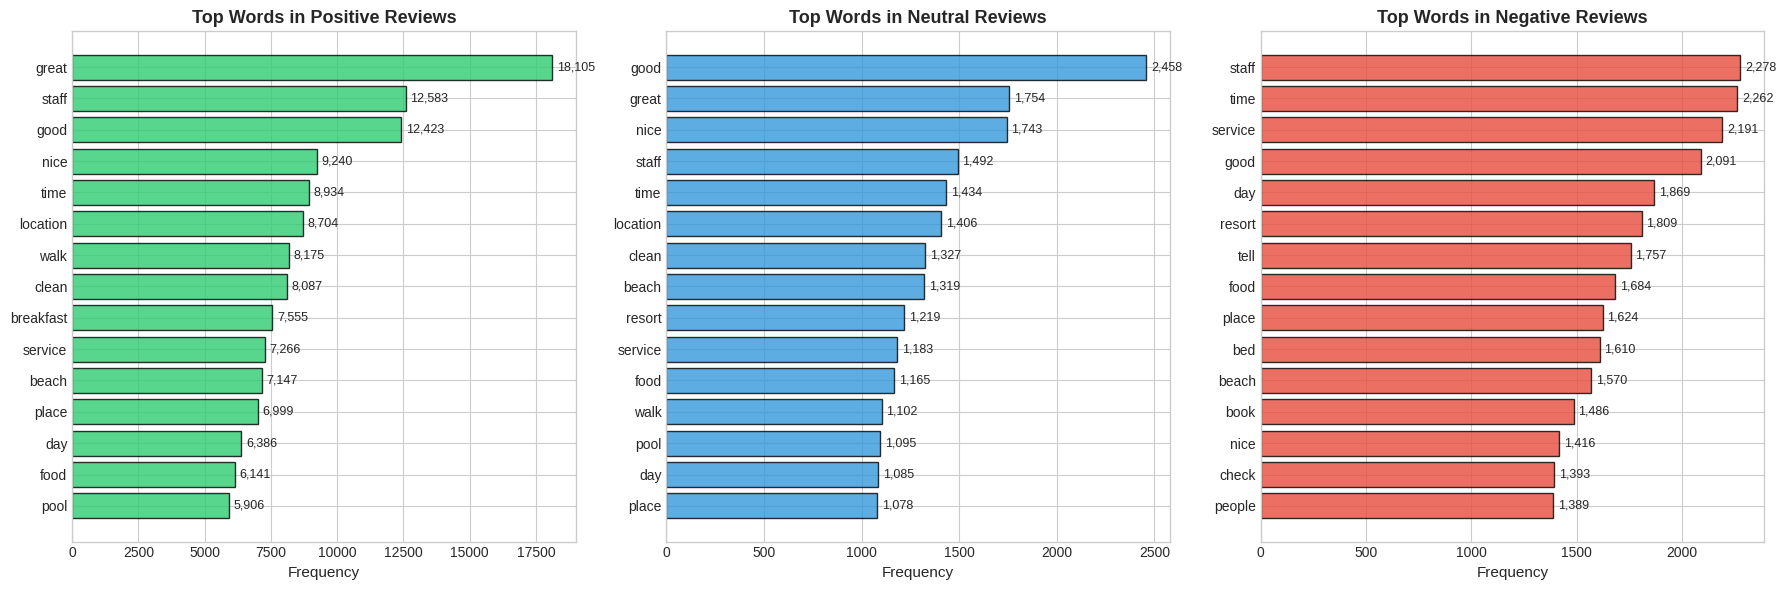


✓ Top words chart saved as 'top_words_by_sentiment.png'


In [23]:
# Top words for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sentiments = ['Good', 'Neutral', 'Bad']
colors_list = ['#2ecc71', '#3498db', '#e74c3c']
titles = ['Top Words in Positive Reviews', 'Top Words in Neutral Reviews', 'Top Words in Negative Reviews']

for ax, sentiment, color, title in zip(axes, sentiments, colors_list, titles):
    reviews = df_clean[df_clean['Rating'] == sentiment]['Review']
    top_words = get_top_words(reviews, 15)

    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]

    bars = ax.barh(words[::-1], counts[::-1], color=color, edgecolor='black', alpha=0.8)
    ax.set_xlabel('Frequency', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')

    # Add count labels
    for bar, count in zip(bars, counts[::-1]):
        ax.text(bar.get_width() + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                f'{count:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('top_words_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Top words chart saved as 'top_words_by_sentiment.png'")


### 6.5 Review Length Statistics by Sentiment


In [24]:
# Calculate statistics by sentiment
length_stats = df_clean.groupby('Rating')['Word_Count'].agg(['mean', 'median', 'min', 'max', 'std'])
length_stats = length_stats.round(2)
length_stats.columns = ['Mean', 'Median', 'Min', 'Max', 'Std Dev']

print("Review Length Statistics by Sentiment:")
print("="*60)
print(length_stats)


Review Length Statistics by Sentiment:
           Mean  Median  Min   Max  Std Dev
Rating                                     
Bad      114.35    86.0   10  1062    99.97
Good      96.44    71.0    6  1720    94.38
Neutral  109.87    82.0    9  1887   104.76


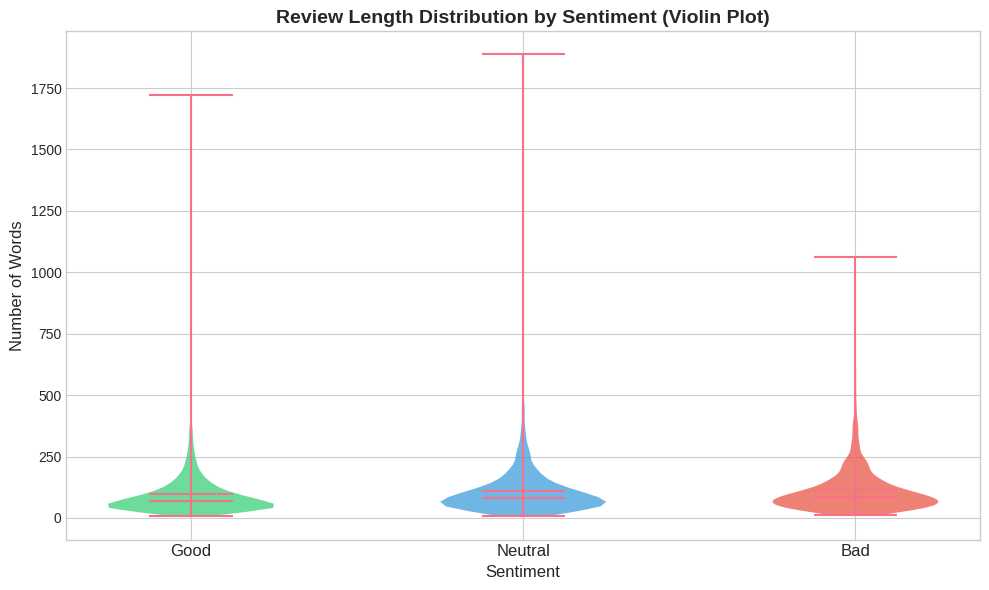


✓ Violin plot saved as 'review_length_violin.png'


In [25]:
# Violin plot for review length distribution
plt.figure(figsize=(10, 6))

# Create violin plot
parts = plt.violinplot([df_clean[df_clean['Rating'] == s]['Word_Count'] for s in sentiment_order],
                        positions=[1, 2, 3], showmeans=True, showmedians=True)

# Color the violins
for pc, color in zip(parts['bodies'], [colors['Good'], colors['Neutral'], colors['Bad']]):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

plt.xticks([1, 2, 3], sentiment_order, fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.title('Review Length Distribution by Sentiment (Violin Plot)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('review_length_violin.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Violin plot saved as 'review_length_violin.png'")


## 7. Summary Statistics


In [26]:
# Final summary
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"\nTotal Reviews: {len(df_clean):,}")
print(f"\nSentiment Breakdown:")
for sentiment in ['Good', 'Neutral', 'Bad']:
    count = len(df_clean[df_clean['Rating'] == sentiment])
    pct = count / len(df_clean) * 100
    print(f"  • {sentiment}: {count:,} ({pct:.1f}%)")

print(f"\nReview Length (Words):")
print(f"  • Average: {df_clean['Word_Count'].mean():.0f} words")
print(f"  • Median: {df_clean['Word_Count'].median():.0f} words")
print(f"  • Range: {df_clean['Word_Count'].min()} - {df_clean['Word_Count'].max()} words")

print(f"\nReview Length (Characters):")
print(f"  • Average: {df_clean['Length'].mean():.0f} characters")
print(f"  • Median: {df_clean['Length'].median():.0f} characters")


DATASET SUMMARY

Total Reviews: 20,491

Sentiment Breakdown:
  • Good: 15,093 (73.7%)
  • Neutral: 2,184 (10.7%)
  • Bad: 3,214 (15.7%)

Review Length (Words):
  • Average: 101 words
  • Median: 74 words
  • Range: 6 - 1887 words

Review Length (Characters):
  • Average: 661 characters
  • Median: 491 characters


## 8. Save Preprocessed Data & Download Visualizations


In [27]:
# Save the cleaned dataframe for use in model training
df_clean.to_csv('preprocessed_reviews.csv', index=False)
print("✓ Preprocessed data saved as 'preprocessed_reviews.csv'")

# List of visualization files
viz_files = [
    'sentiment_distribution.png',
    'review_length_distribution.png',
    'wordclouds_by_sentiment.png',
    'top_words_by_sentiment.png',
    'review_length_violin.png'
]

print("\n" + "="*60)
print("VISUALIZATION COMPLETE!")
print("="*60)
print("\nGenerated files:")
for f in viz_files:
    print(f"  ✓ {f}")

print("\n✓ All visualizations have been generated successfully!")
print("\nNext: Run the '02_model_training.ipynb' notebook for model training.")


✓ Preprocessed data saved as 'preprocessed_reviews.csv'

VISUALIZATION COMPLETE!

Generated files:
  ✓ sentiment_distribution.png
  ✓ review_length_distribution.png
  ✓ wordclouds_by_sentiment.png
  ✓ top_words_by_sentiment.png
  ✓ review_length_violin.png

✓ All visualizations have been generated successfully!

Next: Run the '02_model_training.ipynb' notebook for model training.


In [ ]:
# Download files (for Google Colab)
from google.colab import files

# Download preprocessed data
files.download('preprocessed_reviews.csv')

# Download all visualization images
for f in viz_files:
    try:
        files.download(f)
        print(f"Downloaded: {f}")
    except:
        print(f"Could not download: {f}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: sentiment_distribution.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: review_length_distribution.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: wordclouds_by_sentiment.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: top_words_by_sentiment.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: review_length_violin.png
